In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 92 (delta 6), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (92/92), done.


# Линейная и логистическая регрессия
## Модель линейной регрессии
Модели машинного обучения устанавливают некоторую зависимость выходов от входов, т.е. задают правила, как посчитать выход, зная вход и параметры модели. В зависимости от того, каковы эти правила, различают и разные модели.

Одни из самых простых правил - **линейные**.

Линейные модели задают зависимости вида: 

(y - выход, x- вход, a и b - параметры)

\\(y=a*x+b\\)

Здесь вход x умножается на параметр a и к этому прибавляется параметр b.

Вход и выход могут быть векторами. Пусть х и y - вектора, в этом случае зависимость похожа, но теперь A это матрица параметров, а b - вектор и производится *матричное* умножение. Как вы помните, при матричном умножении необходимо соблюдать размерность, количество столбцов в матрице А равно количеству элементов в векторе х, а количество строк в матрице А равно количеству элементов в векторе у и равно количеству элементов в векторе b.

$ \overrightarrow{y}=A*\overrightarrow{x}+\overrightarrow{b} \\ \
\\
\overrightarrow{x} - вектор\ размерности\ N \\ 
\overrightarrow{y} - вектор\ размерности\ M \\ 
\overrightarrow{b} - вектор\ размерности\ M \\ 
A - матрица\ размерности\ M*N \\ $


Линейные зависимости очень просты, их легко считать, линейные модели легко обучать, но - всегда есть но - они хороши только для простых данных с почти линейными зависимостями, а такое бывает очень редко. Все же линейная модель это первое, что стоит попробовать при решении задачи, часто они используются как начальный вариант с другими моделями. Модели, которые не являются линейными, называются **нелинейными**, с ними познакомимся в другой раз.

Следует указывать также, по какой переменной модель линейна, может быть так, что она линейна по входу, но не по параметрам, а может наоборот. Линейная регрессия линейна и по входу и по параметрам.

## Обучение линейной регрессии. Итерационный метод наименьших квадратов.
Мы задали модель, теперь ее нужно обучить. Обучить - значит подобрать параметры так, чтобы ошибка была как можно меньше. Нужно задать и посчитать ошибку.

Много способов придумано для расчета ошибки, пожалуй самый распространенный из них это **метод наименьших квадратов** (МНК). 

В методе наименьших квадратов ищут такие параметры, которые дали бы наименьшее значение суммы квадратов расстояний выходов модели от заданных (указаний учителя) на заданных входах. Такая длинная и непонятная фраза, давайте посмотрим на одномерном примере.

Задано **P** примеров данных (синие точки): вход **х** и желаемый выход (указания учителя) **t**.

![img](https://drive.google.com/uc?id=1dFaEsDIqbufA3VgIlMfZ4kyi-9K7h5aW)

Если мы выбрали какие-то параметры **a** и **b**, то для любого входа **x** можем посчитать выход модели **y**. Как вы можете догадаться это будет прямая линия (зеленая).

В идеальном случае выход **y** для заданного входа **х** должен совпасть с указанием учителя **t** для этого же входа. А если не совпадает, то модель ошибается. Мы можем посчитать насколько именно ошибается модель (красная пунктирная линия). Ошибка это разница между тем что получилось и тем что должно было получиться на выходе \\(e(x)=y(x)-t(x)\\). Для каждого входа **х** эта ошибка своя, попытаемся уменьшить ее для одного входа - может увеличиться для другого. Надо сделать так, чтобы для всех входов сразу общая ошибка была как можно меньше. Но обратите внимание, что такая ошибка имеет знак. Если мы просто сложим ошибки разного знака (+5 и -5 например) то суммарная будет 0, но модель не угадает выходы: на одном она ошиблась в одну сторону (+5), на другом - в другую (-5). Поэтому нужно использовать не саму ошибку, а ее абсолютное значение, модуль. Модуль не очень приятная функция, она не дифференцируемая в нуле, лучше вместо модуля использовать квадрат модуля! А вот тут все прекрасно, квадрат модуля дифференцируемая функция, считается не так уж сложно и неотрицательна. Причем равняется нулю, только если аргумент равен нулю. 

Итак, будем использовать функцию ошибки: сумма по всем примерам **P** квадратов разности действительного выхода **y** и желаемого выхода **t** на входных примерах **x**. 


$ E=\sum_{i=1}^{P} e(x_i)^2=\sum_{i=1}^{P} (y(x_i)-t(x_i))^2\\
x_i : i-ый\ пример\ входа\\
t(x_i) : указание\ учителя\ для\ него\\
y(x_i) : выход\ модели\ для\ него \\ $

Ради математической красоты можно поделить это на 2 и на P, но мы не будем, нас волнует не конкретное значение функции ошибки, а где находится ее минимум, а умножением и делением на константы мы положение минимума не меняем.

Мы явно не написали, но функция ошибки зависит от параметров модели. Почему? Потому что от них зависит выход **y**. Изменяя параметры модели можем найти такие, для которых ошибка будет наименьшей. Отсюда и название метода наименьших квадратов - функция ошибки это сумма квадратов чего-то там, и мы ищем наименьшее ее значение.


Оценки коэффициентов для обыкновенных наименьших квадратов полагаются на независимость показателей. Когда показатели коррелированы и столбцы матрицы плана имеют приблизительную линейную зависимость, матрица плана становится близкой к сингулярной, и в результате оценка методом наименьших квадратов становится очень чувствительной к случайным ошибкам в наблюдаемой цели, что приводит к большой дисперсии. Эта ситуация мультиколлинеарности может возникнуть, например, когда данные собираются без экспериментального плана.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f (x) = m⋅x + b, где m — наклон линии, а b — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для m и b, так что f (x) приближается как можно ближе к y. Попробуем несколько случайных кандидатов:

![img](https://drive.google.com/uc?id=1SnzGFi8-FF_pRUCbCEKaIyJKYc4oLuIk)

Довольно очевидно, что первые две линии не соответствуют нашим данным. Третья, похоже, лучше, чем две другие. Но как мы можем это проверить? Формально нам нужно выразить, насколько хорошо подходит линия, и мы можем это сделать, определив функцию потерь.

**Функция потерь** — это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением. Например, взяв строку из среднего примера выше, f(x)=−0.11⋅x+2.5.

![img](https://drive.google.com/uc?id=1HRCCUQdnaoLPkZbX23ENgUBaBjjPqugs)


 
### Градиентный спуск.
Осталось найти параметры, для которых функция ошибки минимальна. Много разных методов есть для этого. 

Например, перебор: изменяем параметры, смотрим уменьшилась ли функция ошибки, если уменьшилась - запоминаем эти значения параметров, если нет - не запоминаем. И так перебираем все возможные значения параметров. Метод хороший, если у нас мало возможных значений параметров, но такое бывает крайне редко. Ну-ка посчитайте, если есть два параметра, каждый может принимать 10 значений, то сколько всего вариантов комбинаций параметров может быть? 100? Правильно, сто это не так много, переберем. А если три таких параметра? И тысячу переберем. А если таких параметров всего-то 100, сколько вариантов перебрать надо? Ой-ой, по-гуглите, есть ли у такого числа название. Даже если с начала зарождения вселенной каждую наносекунду по одному варианту перебирать, то так все и не переберем, вот проклятье! Такая ситуация, что количество вариантов перебора растет очень-очень быстро так и называется **проклятие размерности**. Нет, переборы нам ненужны.

Ну ладно, другой вариант: Если присмотреться к функции ошибки, то поймем, что от параметров она зависит квадратично. Всего-то нужно решить квадратное уравнение. И это можно сделать. Но мы не будем. Все хорошо только потому, что функция ошибки квадратична по параметрам. Это прекрасное свойство для линейных моделей, но вот для нелинейных это не так. Хотелось бы все-таки метод, который к любым, ну или большинству, моделям подходил.

И такой метод есть - это **градиентный спуск**, нет, лучше, **ГРАДИЕНТНЫЙ СПУСК**. Большие буквы заслужены, этот метод является основой основ машинного обучения, ему мы обязаны современными чудесными приложениями. Чтобы понять суть метода нужно вспомнить, что такое **производная**. 

Представьте, что вы стоите на горе с закрытыми глазами. Вам надо спуститься вниз. Вы не видите где этот низ расположен, но чувствуете, куда поверхность опускается, и можете понять, идти ли вам направо или налево, чтобы спускаться. Ах, вот если бы для функции, не видя ее графика, можно было понять, она увеличивается или уменьшается в конкретной точке. Но как раз это и показывает производная функции. Если производная больше нуля - функция возрастает, если меньше нуля - убывает, а если ноль - то не изменяется с ростом аргумента. Нам нужен минимум функции ошибки, значит двигаться надо в сторону ее убывания. Вы, стоя на горе, можете сделать маленький шаг в направлении низа, и мы можем немножко изменить параметр модели в том направлении, куда функция ошибки убывает. А потом еще раз, и еще раз, и еще. Дойдем до низа, производная станет равна нулю. Если перескочим (ну вот такие длинные шаги), сразу почувствуем что направление изменилось и низ с другой стороны, а производная изменит знак. 

Все что нам нужно сделать, так это считать производную функции ошибки по параметру и изменять его, постепенно увеличивая или уменьшая в зависимости от знака (и величины) производной. В многомерном случае, когда параметров много, нам нужно считать производные функции ошибки по каждому из них, 100 параметров - 100 производных посчитать надо. Вектор, составленный из производных по каждому параметру называют **градиентом**. 

Итак, в методе градиентного спуска мы считаем вектор градиента и изменяем вектор параметров в направлении антиградиента (т.е. "минус" градиента). Так делаем несколько раз *итеративно* (в цикле).
Пусть **t** - номер текущей итерации, **w(t)** - параметр модели, на этой итерации , **E(t)** - функция ошибки на этой итерации, зависящая от всех параметров, входов, и указаний учителя, тогда на следующей итерации **t+1** параметр в методе градиентного спуска задается как:

\\(w(t+1)=w(t)-s*\frac{\partial E(t)}{\partial w}\\)

то есть новое значение параметра равно текущему значения *минус* производная функция ошибки по этому параметру умноженная на коэффициент **s**. Минус потому, что нужно в сторону уменьшения функции ошибки двигаться. Коэффициент **s** (вместе с величиной производной) определяет длину шага, как сильно мы изменяем параметр. Его задают вручную, но есть и методы для автоматического подбора шага. Для краткости называют его "шаг" обучения (learning rate).

Это очень простой метод, но в нем есть много подводных камней, мы про них поговорим отдельно на других занятиях, пока попробуйте самостоятельно понять какие трудности с ним могут возникнуть.    

### Итерационный МНК.
Но вернемся к линейной регрессии. Для нее функция ошибки квадратична по параметрам и посчитать производную легко. В нашем примере мы имеем два параметра **a** и **b**. Легко посчитать, что тогда:
* производная по **a** равна \\( \frac{\partial E}{\partial a}= 2 * \sum_{i=1}^{P} (y(x_i)-t(x_i)) * x_i\\)
* производная по **b** равна \\( \frac{\partial E}{\partial b}= 2 * \sum_{i=1}^{P} (y(x_i)-t(x_i))\\)

И правда, производная суммы равна сумме производных. Внутри суммы квадрат. Производная от квадрата чего-либо это два умножить на это что-либо. В скобочках выход минус указание учителя. Указание учителя от параметра не зависит, значит для него производная ноль. Остается выход y. Но выход это произведение входа **x** на параметр **a** плюс параметр **b**. Значит для него производная по **a** будет равна **x**, а по  **b** будет равна 1, потому что вход от параметров не зависит и параметры друг от друга не зависят. 

Теперь мы знаем как обучить линейную регрессию, давайте это и сделаем. Сначала сделаем программу для расчета сами, а в будущем будем пользоваться реализацией из библиотек.

### Генерация данных
Сгенерируем данные, которые похожи на линейную зависимость, но все же не точно линейны.

In [ ]:
import numpy as np # подключим библиотеку для работы с массивами 

np.random.seed(42) # начало генератора случайных чисел, чтобы после перезапуска были одинаковые

x = np.random.randn(1, 100) #(100, 1) # генерируем случайно несколько примеров входа, одномерный.
a, b = 2, 1 # коэффициенты зависимости в данных
eps = .1 * np.random.randn(1, 100) # шум с нормальным распределением
y = b + a*x + eps # примеры выхода

x.shape, y.shape

((1, 100), (1, 100))

Перемешаем и разделим примеры на тестовые и обучающие.

In [ ]:
new_ind = np.arange(100) #сгенерируем массив последовательных чисел по количесвту данных - индексы данных

np.random.shuffle(new_ind)# случайно перемешаем их (переставим элементы массива)
new_ind #

array([93, 28, 55, 30, 80, 17, 54, 76, 10,  9,  2, 87, 46, 98, 84, 82, 26,
       69, 85, 52, 40, 67, 99, 63, 83,  0, 45, 11, 95, 22, 66, 20, 33, 90,
       27, 37, 97, 18, 70, 86, 77, 39, 34, 29, 72, 81, 58,  3, 92,  4, 60,
       43, 78, 96, 36, 94, 53, 74,  5, 91, 51, 48, 73, 79, 68, 21, 61, 71,
       57, 88, 50, 62, 31, 65, 14, 75, 13, 15,  7, 64, 19, 44, 35, 56,  6,
       59, 12, 23, 24, 49, 25, 41, 38, 47, 42,  8, 32, 16, 89,  1])

In [ ]:
train_idx = new_ind[:70]# первую часть индексов (с 0 до 69) определим как обучающие
test_idx = new_ind[70:]# вторую часть индексов (с 70 до конца=99) определим как тестовые
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x[0][train_idx], y[0][train_idx]# обучающие вход и желаемый выход
x_test, y_test = x[0][test_idx], y[0][test_idx]# тестовые вход и желаемый выход


Посмотрим на полученные данные. Мы используем ранее написанную функцию `plot_line_or_scatter` для отрисовки. Мы сохранили ее в файл utils.py из которого ее и можно подключить. Функция основана на matplotlib и в файле можно посмотреть на ее реализацию.

Зависимость между входом **x** и выходом **y** получилась почти линейная, как мы и хотели.

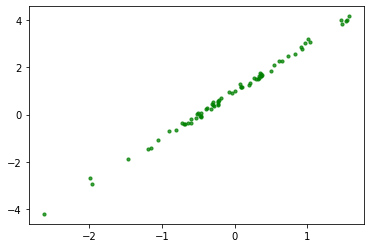

In [ ]:
from ML_School.utils import plot_line_or_scatter as plt_my # подключаем функцию для рисования
plt_my('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа

### Обучение модели
Теперь забудем что мы делали данные сами, представим что нам их кто-то дал и велел сказать, какая зависимость между входом и выходом в этих данных.

Предположим, что зависимость линейная, тогда мы можем узнать коэффициенты этой зависимости с помощью линейной регрессии.

Процесс обучения линейной регрессии итерационный, на каждом шаге мы от старых значений параметров отнимаем величину, зависящую от производной функции ошибки по этому параметру. Но итерации надо с чего-то начать, т.е. у нас должны быть "старые" значения параметров еще до начала итераций. Указание таких "старых" значений называется **инициализацией**, параметры нужно инициализировать. Это одна из проблем градиентного спуска и итерационных методов вообще. От того как мы инициализируем параметры будет зависеть и скорость обучения и результат обучения и сможет ли модель вообще чему-то полезному обучиться. Когда не знаешь как лучше - делай случайно: инициализируем параметры случайными числами из нормального распределения.

В линейной регрессии для одномерных величин мы имеем два параметра: коэффициент (множитель) **a**  и смещение (слагаемое) **b**. 

In [ ]:
a =  np.random.randn(1)# случайное число для параметра a
a

array([-0.23739196])

In [ ]:
b = np.random.rand(1)# случайное число для параметра b 
b

array([0.09783416])

Обучать будем методом наименьших квадратов, для него нужно задать несколько гиперпараметров: шаг обучения  и количество итераций обучения, назовем их эпохами.

In [ ]:
lr = 10e-3 # шаг обучения
epochs = 100 # количество эпох


In [ ]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть
    
    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам 
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a
    
    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b      
    
    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 0.008355   a=1.947  b=0.978
ep:  20  loss: 0.007882   a=1.956  b=0.980
ep:  40  loss: 0.007606   a=1.963  b=0.982
ep:  60  loss: 0.007445   a=1.969  b=0.983
ep:  80  loss: 0.007351   a=1.973  b=0.983
ep:  99  loss: 0.007298   a=1.976  b=0.984


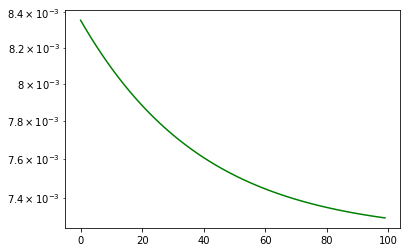

In [ ]:
# посмотрим на функцию ошибки
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

Запускайте цикл обучения несколько раз, смотрите, как обучается модель.

В итоге, мы пришли к *почти* тем же самым параметрам, которые использовались при создании данных, т.е. установили зависимость. Проверим на тестовых данных.

Сначала рассчитаем выходы модели на тестовых примерах входов `x_test`.
У нас уже были соответствующие желаемые тестовые выходы для них в `y_test`.
Построим их.

In [ ]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

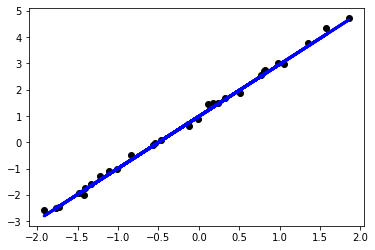

In [ ]:
# нарисуем
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

Получилось довольно точное приближение, значит мы обучили линейную регрессию правильно.
### Библиотека `sklearn`
Давайте сделаем тоже самое с помощью библиотеки. Будем использовать библиотеку [`sklearn`](https://scikit-learn.org/stable/) в которой реализовано множество моделей, в том числе и линейная регрессия.  
Модели вообще и линейная регрессия в частности реализуются специальными классами для которых реализованы методы обучения, расчета выхода, ошибки и другие функции. Линейная регрессия представлена в [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

Давайте подключим эту модель из `sklearn.linear_model` и создадим объект такого класса.

Для модели линейной регрессии реализовано несколько методов:
* `fit()` -  для обучения моделей. Мы указываем массив примеров входов, массив примеров желаемых выходов (указаний учителя) и возможно дополнительные аргументы. Создает дополнительно поля `coef_` для хранения множителей **a** и `intercept_` для смещений **b**. (изначально таких полей нет).
* `predict()` - расчет выходов модели при заданных входах и сохраненных в модели параметрах
* `score()` - расчет значения функции ошибки для заданных примеров
* `get_params()`, `set_params()` - для чтения и установки параметров модели.


В `sklearn`, да и во многих других библиотеках, принято, чтобы в массивах примеры были первым измерением, а признаки - вторым. Для регрессии одномерной величины на 70 примерах, массив примеров должен быть размером 70 на 1. За этим нужно внимательно следить, если мы перепутаем порядок измерений и подадим массивы размера 1 на 70, то вычислительной ошибки не будет, но мы решим не ту задачу: вместо регрессии одномерной величины на 70 примерах, мы найдем регрессию 70-мерной величины на одном примере. Поэтому мы принудительно переформатируем размер массивов с помощью `reshape()`. Очевидно количество примеров в массивах входа и желаемого выхода должно быть одинаковым. 

*Примечание: По-видимому `sklearn` использует другой метод для обучения (на основе решения системы линейных уравнений), а не градиентный спуск, и немного другую функцию ошибки, но результат тот-же. Поэтому здесь не задается ни начальное значение параметров (инициализация), ни величина шага обучения. Это допустимо для линейной регрессии, но для более сложных случаев так не получится.*  


Обученные параметры: b=0.9860 a=1.9868


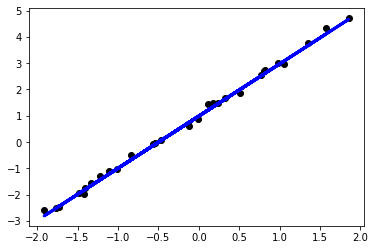

In [ ]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
linr.fit(x_train.reshape(70, 1), y_train.reshape(70, 1)) # обучим модель, принудительно переформатировав размеры массивов
print('Обученные параметры: b=%6.4f a=%6.4f'%(linr.intercept_, linr.coef_)) #

y_test_pred=linr.predict(x_test.reshape(30,1))# посчитаем выход модели
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)# нарисуем его 
plt.scatter(x_test, y_test,  color='black') # и желаемый
plt.show()


Давайте теперь попробуем сделать линейную регрессию на каких-то более-менее реальных данных из примеров `sklearn`. В этом наборе для классификации содержатся 3 класса примеров, количество примеров 59,71,48 для соответствующих классов (всего 178 примеров), каждый пример это 13-мерный вектор из действительных положительных чисел и номер класса.

Нам пригодятся вспомогательные функции `sklearn`:
* `train_test_split()` - случайно разделяющая данные на обучающие и тестовые в заданных долях. Подключаем ее из `sklearn.model_selection`



In [ ]:
from sklearn.datasets import load_wine # функция которая загружает набор данных 

In [ ]:
data_wine = load_wine() # загружаем набор данных
data_wine.target[[10, 80, 140]] # в поле target хранятся номера классов примеров, некоторые из них приведены

array([0, 1, 2])

In [ ]:
list(data_wine.target_names) # названия классов в поле target_names

['class_0', 'class_1', 'class_2']

In [ ]:
X = data_wine.data # в поле data - примеры входов, вектора
y = data_wine.target # Указания учителя = номера классов

from sklearn.model_selection import train_test_split # подключаем функцию для разделения данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # и отдаем 30% на тест, остальное на обучение
#y_train # убедитесь что и в обучении и в тесте есть данные разных классов
y_test #

array([0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 0])

In [ ]:
X_train[:3] # первые три примера входов обучающих данных 

array([[1.383e+01, 1.570e+00, 2.620e+00, 2.000e+01, 1.150e+02, 2.950e+00,
        3.400e+00, 4.000e-01, 1.720e+00, 6.600e+00, 1.130e+00, 2.570e+00,
        1.130e+03],
       [1.410e+01, 2.160e+00, 2.300e+00, 1.800e+01, 1.050e+02, 2.950e+00,
        3.320e+00, 2.200e-01, 2.380e+00, 5.750e+00, 1.250e+00, 3.170e+00,
        1.510e+03],
       [1.316e+01, 3.570e+00, 2.150e+00, 2.100e+01, 1.020e+02, 1.500e+00,
        5.500e-01, 4.300e-01, 1.300e+00, 4.000e+00, 6.000e-01, 1.680e+00,
        8.300e+02]])

In [ ]:
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=3.5602 
Множители a=  [-1.08457208e-01  3.89996076e-02 -1.67175869e-01  3.13347273e-02
 -4.41904488e-04  2.50423591e-01 -5.36233022e-01 -6.79235939e-01
  1.33499975e-01  6.18988521e-02 -4.70302753e-02 -2.60791691e-01
 -6.76736578e-04]


Давайте разберемся, что же модель нам предсказала.

Для расчета выходов модели используем `predict()` на тестовых данных. А чтобы посчитать ошибку между действительным и желаемым выходом - `score()` (это приведенная ошибка в диапазоне от 0 до 1).

Посмотрим на визуализацию. Мы не можем рисовать 13-мерные графики, поэтому нарисуем их одномерные проекции. 

0.8410802302070728


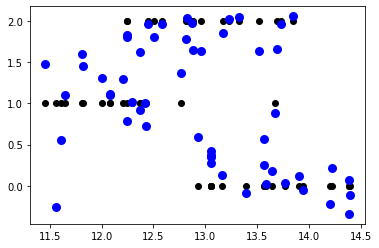

In [ ]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test,y_test)# считаем ошибку
print(score)#
i=0 # номер измерения для построения
plt.scatter(X_test[:,i], y_test,  color='black')# строим желаемые выходы 
plt.scatter(X_test[:,i], y_predicted, color='blue', linewidth=3)# и рассчитанные

Не очень-то хорошее приближение.

Но вообще-то мы решаем задачу классификации, а не регрессии. Надо перевести выходы в номера классов. Для этого округлим значения выходов до ближайшего целого, если результат меньше 0, то установим 0, если больше 2, то установим 2. Сравним с указаниями учителя и посчитаем долю правильных (совпадающих) примеров. Найдем их долю.

Итак, хоть ошибка регрессии визуально большая, но для задачи классификации этих данных линейной регрессии достаточно. 

In [ ]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>2]=2
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

0.9074074074074074

Линейная регрессия очень простая модель, может моделировать только линейные зависимости. Не устойчива к *выбросам* - данным, которые резко выбиваются из примерной зависимости остальных данных (например, из-за ошибки измерения). Попробуйте в предыдущих примерах обучить линейную регрессию, на тех же данных, что были в начале нашего урока (почти линейные) но один обучающий пример испортите - сделайте для него выход скажем равным 100. И попробуйте снова обучить модель.      

# Логистическая регрессия
Логистическая регрессия похожа на линейную, но выход ее это не просто сумма произведений параметров и входов со смещением, а некоторая функция от этого. Применяют функцию под названием "сигмоида" или "логистическая функция", отсюда и название модели.

Сигмоида это функция вида: \\(f(x)= \frac{1}{1+e^{-x}}\\)

Нарисуем ее график, позаимствовав эту функцию, назвали `expit()`, из библиотеки [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html)  

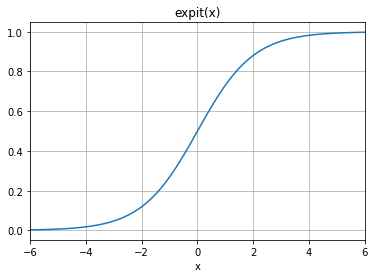

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import expit # подключаем функцию из библиотеки
x = np.linspace(-6, 6, 121) # диапазон по х
y = expit(x) # значение функции по у
plt.plot(x, y) #
plt.grid() #
plt.xlim(-6, 6)#
plt.xlabel('x')#
plt.title('expit(x)')#
plt.show()#

Как нетрудно убедиться значения этой функции всегда лежат в пределах от 0 до 1, в нуле принимает значение 0.5. Если бы мы просто в линейной регрессии добавили эту функцию, то никогда не смогли бы моделировать зависимости, у которых выходная переменная больше 1 или меньше 0. Поэтому в логистической регрессии требуют, чтобы и указания учителя были в диапазоне 0...1.

Выход же логистической регрессии: 

\\(\overrightarrow{y}=f(A*\overrightarrow{x}+\overrightarrow{b})\\), 

где сигмоида применяется поэлементно к каждому компоненту вектора.

Для задач классификации, можно существенно изменить функцию ошибки. Давайте будем рассматривать только бинарную (двухклассовую) классификацию, и будем один класс обозначать величиной 0, второй - величиной 1. Тогда выход логистической регрессии (он от 0 до 1) можно интерпретировать как уверенность модели в том, что вход принадлежит к одному из классов. Выход ближе к нулю - принадлежит к классу 0, выход ближе к 1 - принадлежит классу 1.

Чтобы понять функцию ошибки будем рассуждать так:

Давайте посчитаем, насколько **правдоподобно**, что выход описывает заданный класс: 
* если класс должен быть 0, то правдоподобие для него это единица минус значение выхода модели y (должно быть 0, а получилось y, например выход у=0.3 - правдоподобие 1-0.3=0.7 - правдоподобно, большая уверенность в том, что класс 0; выход у=0.9 - правдоподобие 1-0.9=0.1 - совершенно не правдоподобно, очень маленькая уверенность, что класс 0)
* если класс должен быть 1, то правдоподобие для него это само значение выхода модели y (должно быть 1, а получилось y, например выход у=0.3 - правдоподобие = 0.3 - совершенно не правдоподобно, очень маленькая уверенность, что класс 1; выход у=0.9 - правдоподобие = 0.9 - правдоподобно, большая уверенность в том, что класс 1).

Выше приведены рассуждения для одного примера, если их несколько, то найдем произведение правдоподобий для каждого примера.

Например:
* для хорошего классификатора: получились выходы 0.1, 0.9, 0.8, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.1) * 0.9 * 0.8 = 0.648 довольно большое;
* для плохого классификатора: получились выходы 0.4, 0.6, 0.5, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.4) * 0.6 * 0.5 = 0.18 существенно меньше;
* для классификатора-врунишки, который все классы путает: получились выходы 0.7, 0.2, 0.1, а должны были получиться 0, 1, 1. Общее правдоподобие (1-0.7) * 0.2 * 0.1 = 0.006 очень маленькое.

Но работать с произведением маленьких чисел, когда их много, очень сложно, поэтому от значений правдоподобия переходят к его логарифму. Тогда числа по модулю уже не будут маленькими (но будут отрицательными), а произведение превратится в сумму (вспомните свойства логарифма).

Значения, которые мы подставляли для правдоподобия зависят от того, какой класс должен был получиться. Чтобы эти условия "если..." реализовать в одной формуле, можно поступить так:
- когда класс равен 0 нам нужно использовать \\(ln(1-y)\\), когда класс равен 1 нам нужно использовать  \\(ln(y)\\).
- запишем такую формулу: \\(t*ln(y)+(1-t)*ln(1-y)\\), где t (0 или 1) наш класс.   
- тогда при t=0 остается второе слагаемое \\(ln(1-y)\\), а при t=1 остается только первое слагаемое \\(ln(y)\\), как мы и хотели.

Итак, общее правдоподобие нашей модели:

$ E=\sum_{i=1}^{P} (t(x_i)*ln(y(x_i))+(1-t(x_i))*ln(1-y(x_i))\\
x_i : i-ый\ пример\ входа\\
t(x_i) : указание\ учителя\ для\ него\\
y(x_i) : выход\ модели\ для\ него \\ $

Правдоподобие нужно максимизировать, поменяем знак, можно минимизировать. Функция ошибки здесь это минус правдоподобие модели. Похожую формулу можно записать и для случая, когда классов больше чем два, но сейчас мы не будем этого делать. 

В функцию ошибки часто добавляют дополнительные члены, регуляризаторы, которые вводят некоторые ограничения, например чтобы величина параметров была не очень большая. Это бывает и полезно и вредно для обучения. Мы не будем трогать параметры по умолчанию, пока не придется.

Обучается такая модель методами на основе градиентного спуска (чистым градиентным спуском пользуются редко, обычно используют всякие его модификации, в которых, например, могут управлять величиной шага обучения или др.). Какой именно метод используется здесь для наших уроков не принципиально. 

В `sklearn` логистическая регрессия задается с помощью [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) у которой есть такие же методы как и у `LinearRegression()` и некоторые специфичные аргументы:
* tol - точность до которой нужно обучать модель
* C - 1/коэффициент важности регуляризуещего члена в функции ошибки
* penalty -  вид регуляризации, 'none' если хотим отключить регуляризацию (по умолчанию включена)
* solver - название метода обучения, не будем трогать.
* max_iter - максимальное количество итераций для обучения

*Примечание: формулы приведенные для [`LogisticRegression`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) в документации.* 

Для логистической регрессии метод `predict()` возвращает классы (0 или 1 в нашем случае).

Чтобы вернуть выход используем метод `predict_proba()`. Он вернет величины правдоподобия для класса 0 (единица минус выход) и 1 (выход). 



In [ ]:
import numpy as np
import pandas as pd

# Load data
data = pd.read_csv('/content/SPO_PGU/diabetes.csv')
X=data.iloc[:,:7]
y=data.iloc[:,8]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [ ]:
from sklearn.linear_model import LogisticRegression
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       253
           1       0.75      0.56      0.64       131

    accuracy                           0.79       384
   macro avg       0.78      0.73      0.74       384
weighted avg       0.78      0.79      0.78       384



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

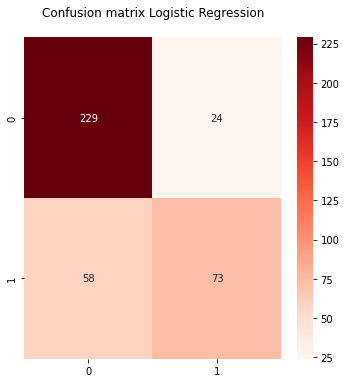

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

`penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’`
Используется для указания нормы, применяемой при наложении штрафов.

`dualbool, default=False`
Двойная или первичная формулировка.

`tolfloat, default=1e-4`
Допуск по критериям остановки.

`Cfloat, default=1.0`
Инверсия силы регуляризации; должно быть положительным числом с плавающей запятой. Как и в машинах опорных векторов, меньшие значения указывают на более сильную регуляризацию.

`fit_interceptbool, default=True`
Указывает, следует ли добавить константу (также известную как смещение или перехват) к функции принятия решения.

`solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’`

**Алгоритм для использования в задаче оптимизации.**

Для небольших наборов данных "`liblinear`" - хороший выбор, тогда как "sag" и "saga" быстрее для больших. 
Для мультиклассовых задач только `"newton-cg", "sag", "saga" и "lbfgs"` обрабатывают полиномиальные потери; «Liblinear» ограничивается схемами «один против остальных». 
`'newton-cg', 'lbfgs', 'sag' и 'saga'` обрабатывают L2 или отсутствие штрафа 
`'liblinear' и 'saga' `также обрабатывают штраф L1 
`'saga'` также поддерживает штраф 
`'elasticnet' 'liblinear' `не поддерживает штраф за установку = 'нет'

`max_iterint, default=100`
Максимальное количество итераций, необходимых для схождения классификатора.

## Домашнее задания

1. Загрузить выборку с сайта Kaggle.com.
2. Провести анализ полученной выборки.
3. Используя данные выборки обучить обыкновенную линейную регрессию и оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
4. Используя данные выборки обучить логистическую регрессию и оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
